<a href="https://colab.research.google.com/github/Bimal999/python/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
  #Libraries
  import numpy as np                   # used for mathematical operation for array manipulation
  import pandas as pd                   #Pandas allows us to analyze big data and make conclusions based on statistical theories.
  import matplotlib.pyplot as plt       # used for visual graphics
  import seaborn as sns                 #Seaborn is a library for making statistical graphics in Python

  #Data Preprocessing
  from sklearn.model_selection import train_test_split

  #Models ML
  from sklearn.svm import SVC

  #Metrics
  from sklearn.metrics import confusion_matrix,accuracy_score
  from sklearn.metrics import mean_squared_error,r2_score
  from sklearn import metrics


In [9]:
data= pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.shape

(768, 9)

In [11]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
list(data.describe().columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [22]:
selecct_col_df=data.columns.to_list()
selecct_col_df

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [23]:
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,202.134968,187.429356,174.529081,232.885854,176.038199
std,246.158860,251.317244,257.761178,277.122478,256.746273
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.761774,32.378160,10.229842,16.367188,16.125898
50%,165.994978,127.157049,95.258429,201.964233,97.321567
75%,211.012100,194.657319,182.585882,287.929951,183.336864
max,768.000000,768.000000,768.000000,846.000000,768.000000


In [24]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,202.134968,187.429356,174.529081,232.885854,176.038199


In [25]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([202.13496789, 187.42935557, 174.52908072, 232.88585401,
       176.03819922])

In [26]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    # print(data.loc[:,col].median())
    # print(data.loc[:,col])

In [27]:
# print(col)
# data.loc[:,col].median()

In [28]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
corr = data[data.describe().columns].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


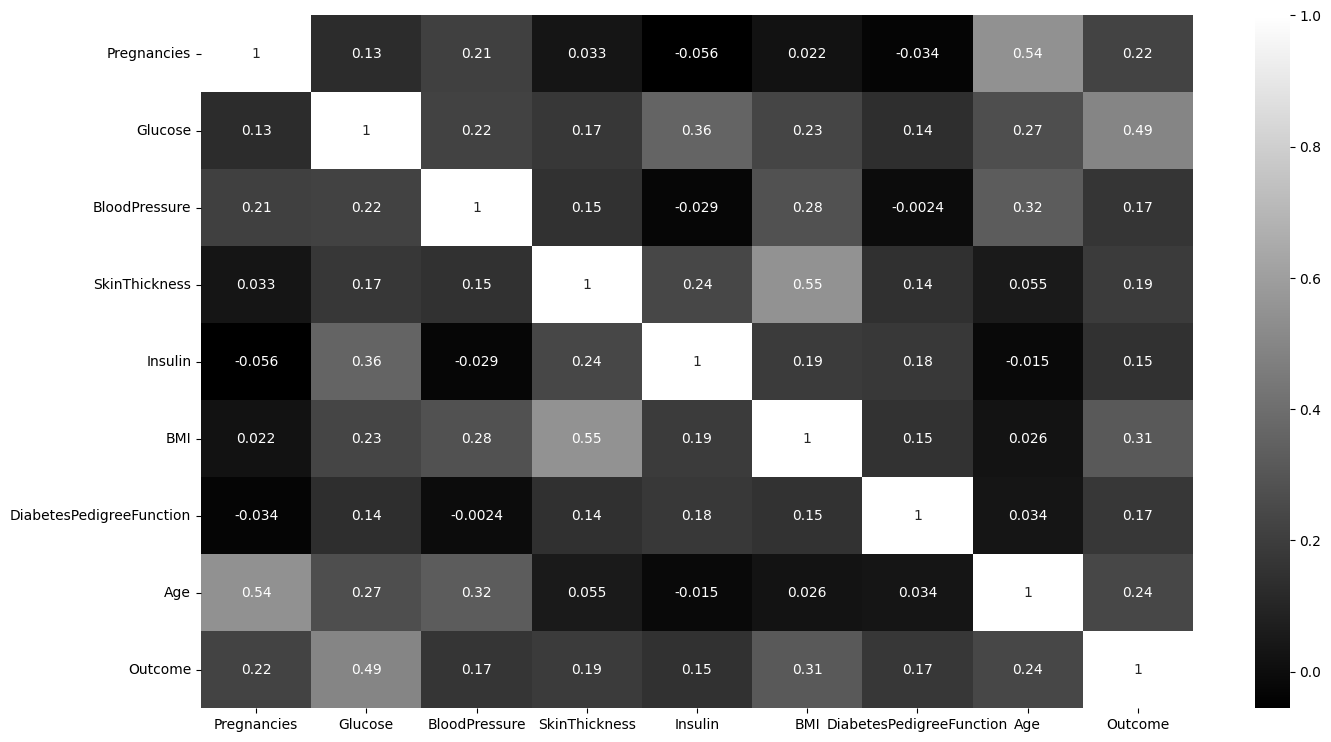

In [38]:
plt.figure(figsize=(16,9))
corr = data.corr()
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('black_white', ['black', 'white'], N=256)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()


In [40]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [41]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [42]:
Y_pred = svc.predict(X_test)

accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(accuracy)

79.221


Accuracy: 0.7922077922077922 %
Mean squared error:  0.208
[[94  5]
 [27 28]]
    0   1
0  94   5
1  27  28


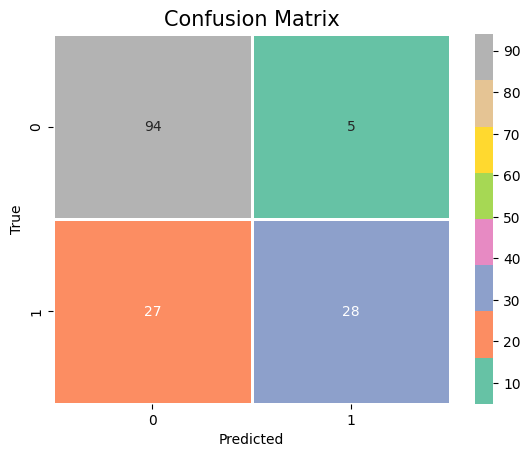

In [46]:
Accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: {} %'.format(Accuracy))
print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
print(df_cm)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()